In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df= pd.read_csv('c:\\Users\\OLOLA\\OneDrive\\Desktop\\data sci\\code alpha\\may-june internship\\Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.shape

(150, 6)

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
iris= df.drop_duplicates()

In [9]:
iris.shape

(150, 6)

In [10]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

DATA VISUALSATION

Text(0.5, 1.02, 'pairplot of iris feature by species')

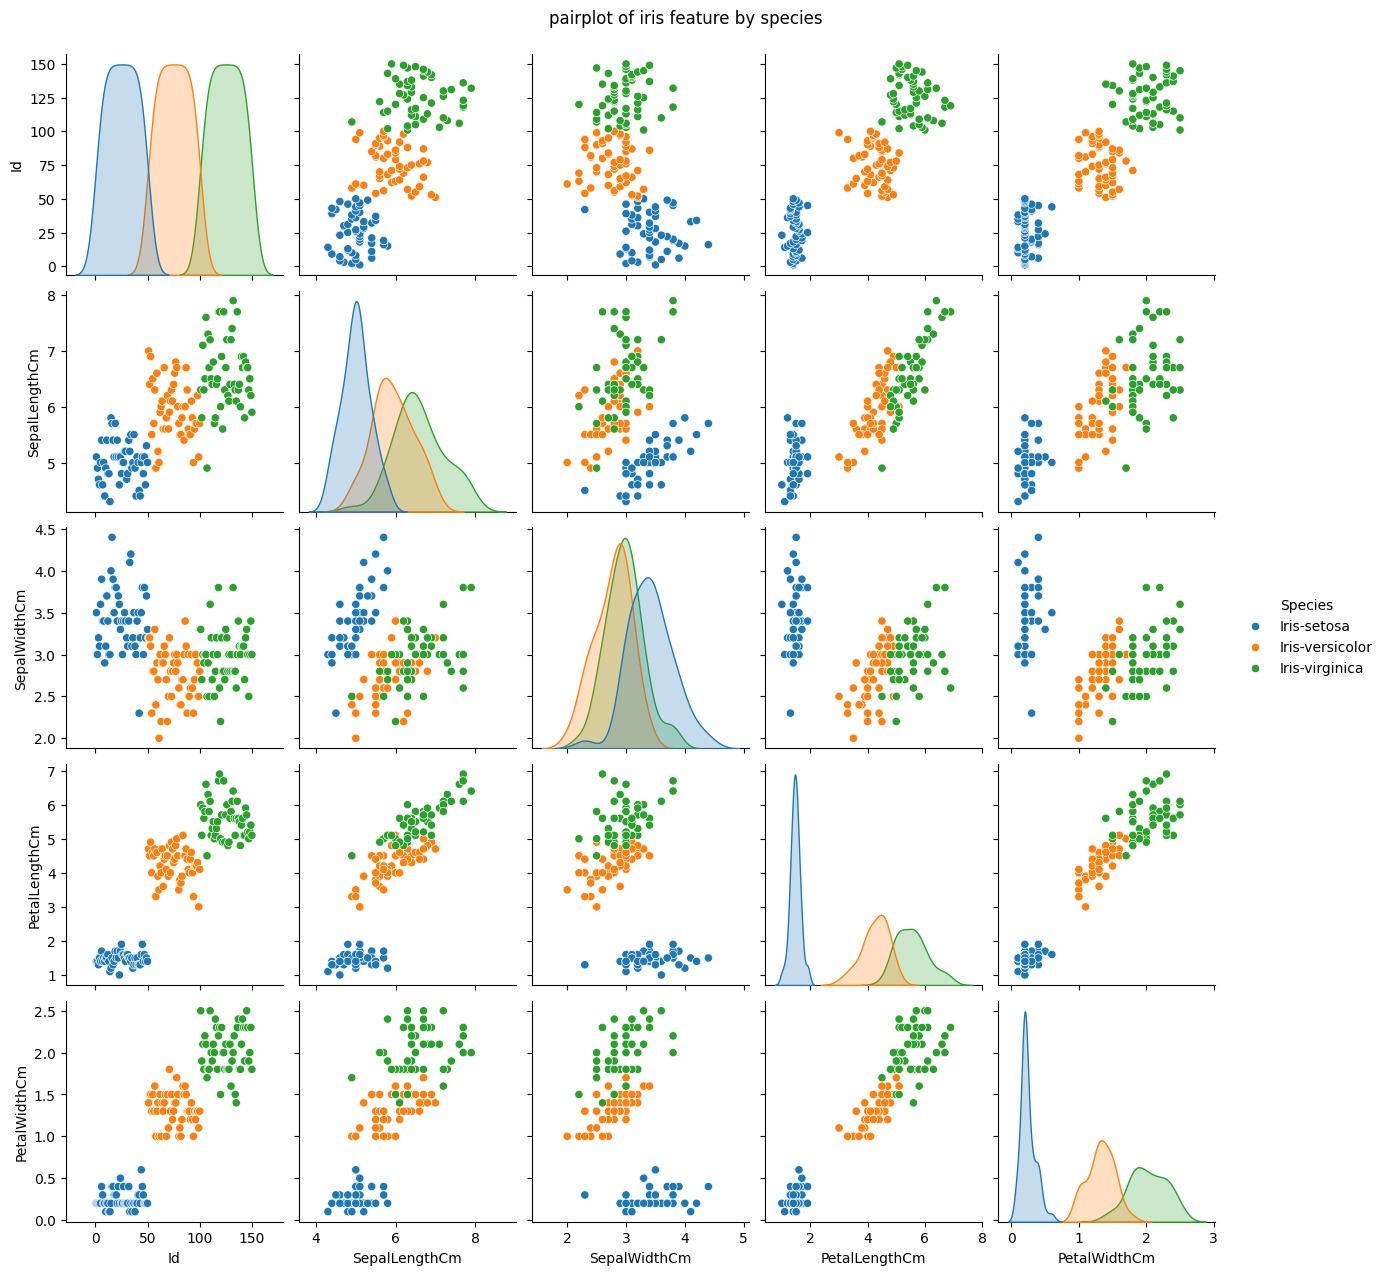

In [12]:
# pair plot
sns.pairplot(iris,hue='Species')
plt.suptitle('pairplot of iris feature by species', y= 1.02)

CORRELATION MATRIX
MULTIVARIATE ANALYSIS

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

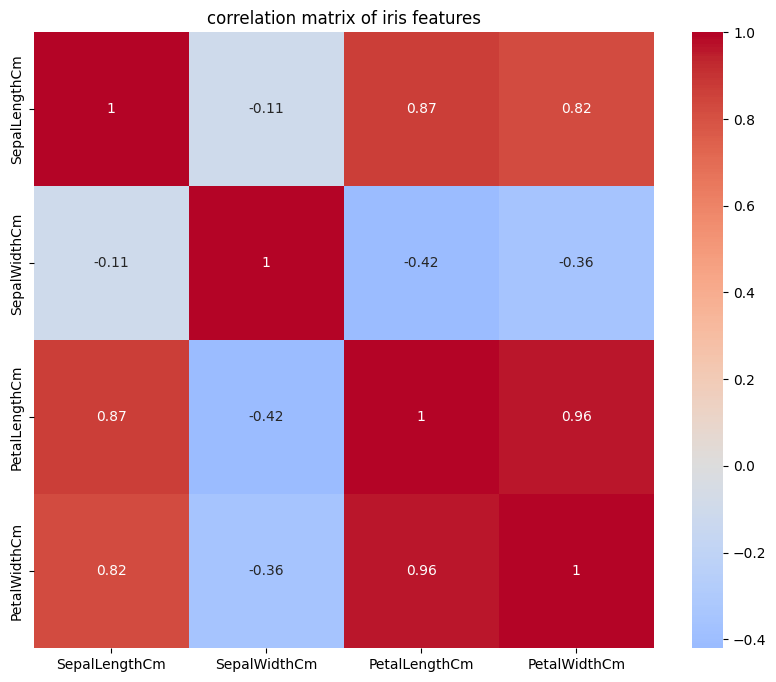

In [14]:
# calaculate correlation
corr = iris.drop('Id',axis=1).corr(numeric_only=True)

# heatmap plot
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap="coolwarm", center=0)
plt.title("correlation matrix of iris features")
plt.show()



In [15]:
# Encode the variable data
# change the char. to numerical var.

from sklearn.preprocessing import LabelEncoder
LE_Species = LabelEncoder()

In [16]:
iris['Species']= LE_Species.fit_transform(iris['Species'])

In [17]:
from sklearn.model_selection import train_test_split
X = iris.drop(columns=['Species','Id'])
X 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
# Iris-setosa = 0, Iris-versicolor = 1,Iris-virginica= 2

y = iris['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [19]:
#train model
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify= y)

In [20]:
#scale for better performance 
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler ()
X_test= scaler.fit_transform(X_test)
X_train= scaler.fit_transform(X_train)

logistic regression

In [21]:
# MODELLING
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# fitting model
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
#pridiction

prediction = model.predict(X_test)
prediction

array([2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 2,
       1])

In [23]:
#checking for accuracy
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(y_test,prediction)
accuracy

0.9111111111111111

decition tree

In [24]:
# modelling 2
from sklearn.ensemble import RandomForestClassifier
Model = RandomForestClassifier ()

# fitting model
Model.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
# making prediction
Y_predic= Model.predict(X_test)
Y_predic

array([2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2,
       1])

In [26]:
#checking for accuracy
from sklearn.metrics import accuracy_score

Accuracy= accuracy_score(y_test,Y_predic)
Accuracy

0.9333333333333333